In [78]:
"""
Visualization of single neuron dynamics for various models
"""
import numpy as np
import matplotlib.pyplot as plt
import neuron
import scipy as sp


# also define figure paramaters
plt.rcParams['xtick.major.size']=6.0#7.0
plt.rcParams['ytick.major.size']=6.0#7.0
plt.rcParams['xtick.major.width']=2.0#2.5
plt.rcParams['ytick.major.width']=2.0#2.5
plt.rcParams['text.usetex'] = True
#plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 22 #15
plt.rcParams['legend.fontsize'] = 18 #14
plt.rcParams['lines.linewidth'] = 3.0
plt.rcParams['errorbar.capsize'] = 4.0

#normalized guassian for constructing input signals
Gaussian_pulse= lambda x, mu, sig: np.exp(-np.power(x - mu, 2.) 
    / (2 * np.power(sig, 2.)))/(np.sqrt(2*np.pi)*sig)

In [87]:
#Demo of spiking Yamada Neuron (version1)
#Create Neuron
Y1mpars={"a": 2, "A": 6.5, "B":-6., "gamma1": 1e-1,
         "gamma2": 1e-1, "kappa": 2, "beta": 1e-2 }

y1_steady_est=[Y1mpars['beta']/Y1mpars['kappa'],
               Y1mpars['A'],Y1mpars['B'] ]
Y1params={"model" : "Yamada_1", "y0": y1_steady_est,
    "dt": 1.e-2, 'mpar': Y1mpars} #quick estimate of ss
Y1Neuron=neuron.Neuron(Y1params)
y1_steady=Y1Neuron.steady_state(y1_steady_est)
#update neuron to have this steady state

#create time signal
N1=int(np.ceil(500/Y1Neuron.dt))
t1_end=50; #atleast this long
N1=int(np.ceil(t1_end/Y1Neuron.dt))
time1=np.linspace(0.,(N1-1)*Y1Neuron.dt, num=N1 )

#choose gaussian input
x1=np.zeros(N1)
x1+=Gaussian_pulse(time1, 10, 1)
#solve and estimate steady state
y1_out=Y1Neuron.solve(x1)


print(y1_steady)
print(y1_out[-1, :])




[ 0.01137256  6.42690958 -5.86656428]
[ 0.01088814  6.17240786 -5.63009296]


''

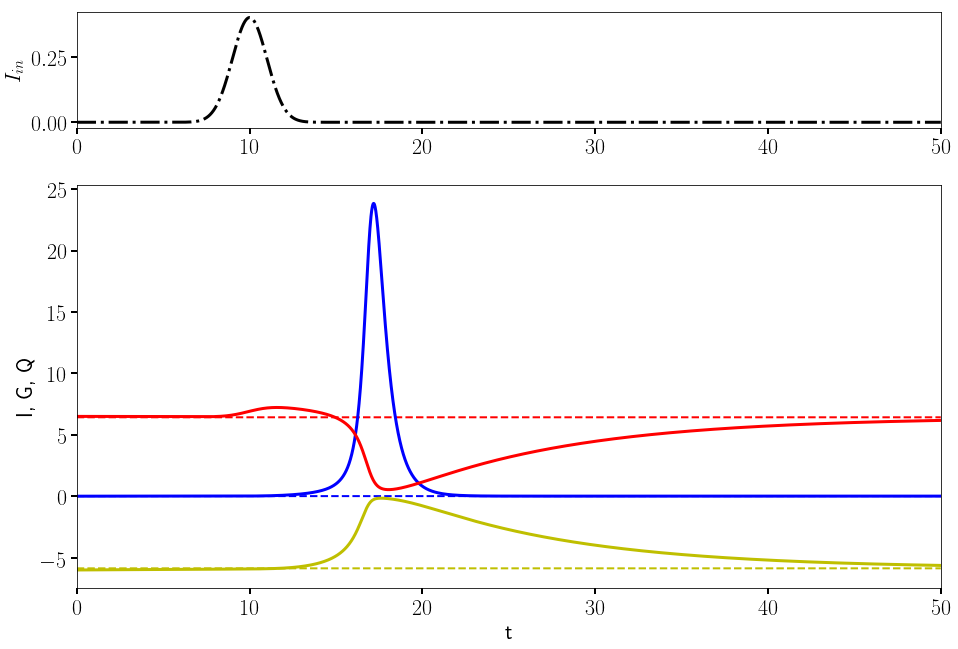

In [88]:
# Plot 
fig=plt.figure(figsize=(12,8))
ax1=fig.add_axes([0,0, 1, 0.7])
# plot steady states
ax1.plot(time1, y1_steady[0]*np.ones(N1), 'b--', linewidth=2)
ax1.plot(time1, y1_steady[1]*np.ones(N1), 'r--', linewidth=2)
ax1.plot(time1, y1_steady[2]*np.ones(N1), 'y--', linewidth=2)
# plot Neuron state
ax1.plot(time1, y1_out[:,0], 'b-')
ax1.plot(time1, y1_out[:,1], 'r-')
ax1.plot(time1, y1_out[:,2], 'y-')

ax1.set_xlabel('t')
ax1.set_ylabel('I, G, Q')
ax1.set_xlim(time1[0], time1[-1])

# plot input current
ax2=fig.add_axes([0,.8, 1, 0.2])
ax2.plot(time1, x1, 'k-.')
ax2.set_ylabel('$I_{in}$')
ax2.set_xlim(time1[0], time1[-1])

# fig.show()
;

2.5066282746310002